In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt



### VIEW WITH A MOJITO

(2000, 0)

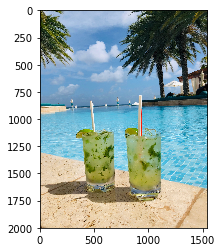

In [6]:
full = cv2.imread('/Users/ankitkothari/Desktop/AA8A5798-9562-40DC-BCD6-22FB2AFD4B4E.jpeg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)
plt.ylim(2000,0,5)

template shape (600, 310, 3)


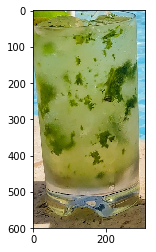

In [17]:
crop_img = full[1100:1700, 390:700]
height, width, channels = crop_img.shape
print(f'template shape {crop_img.shape}')
plt.imshow(crop_img)

### LETS FIND MY MOJITO

In [18]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

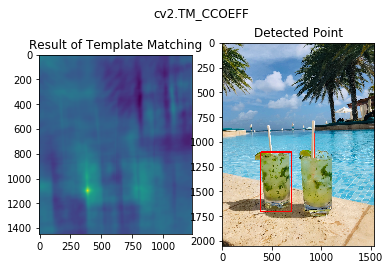

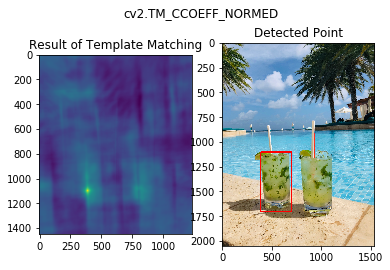

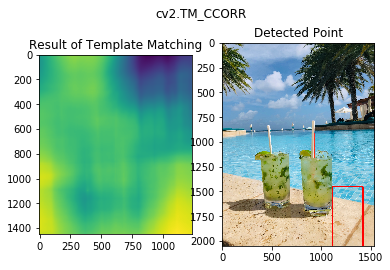

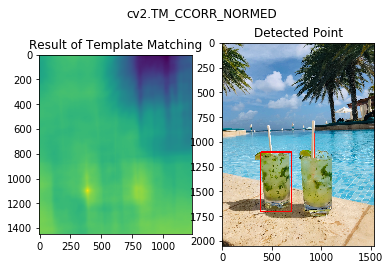

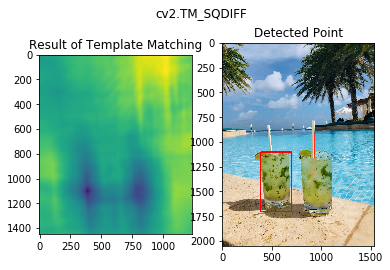

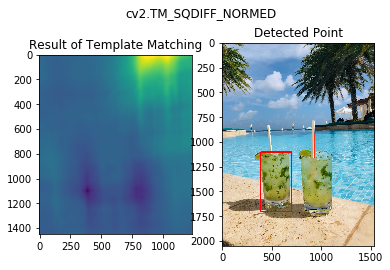

In [19]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    # Get the actual function instead of the string
    method = eval(m)
    
    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,crop_img, method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    
    
    plt.show()
    print('\n')
    print('\n')

###### So what exactly is the cv2.matchTemplate function doing? Essentially, this function takes a “sliding window” of our waldo query image and slides it across our puzzle image from left to right and top to bottom, one pixel at a time. Then, for each of these locations, we compute the correlation coefficient to determine how “good” or “bad” the match is.

Regions with sufficiently high correlation can be considered “matches” for our waldo template. From there, all we need is a call to cv2.minMaxLoc to find where our “good” matches are. 